# Takagi-Sugeno-Kang Inference with HotFIS

> This notebook demonstrates a use case where a fuzzy inference system (FIS) is created using HotFIS to address the tipping example often used to illustrate fuzzy logic. Zeroth order Takagi-Sugeno-Kang inference is employed with rules having multiple antecedents.

---

## Table of Contents

* [Setup](#c0)
* [FIS Creation](#c1)
* [FIS Evaluation](#c2)

---

## Setup  <a name="c0"></a>

In [1]:
import hotfis as hf

# Import matplotlib for plotting functionality
import matplotlib.pyplot as plt

---

## FIS Creation  <a name="c1"></a>

##### Create Membership Function Groupset

> Creating a FIS requires the definition of membership functions corresponding to fuzzy sets. To do this, a FuzzyGroupset must be constructed. FuzzyGroupsets are collections of FuzzyGroups that themselves contain FuzzyFuncs, or functions capable of computing membership of input to implicitly defined fuzzy sets.

In [5]:
# Define membership function groupset
groupset = hf.FuzzyGroupset([
    # Input group 1
    hf.FuzzyGroup("service", 0, 10, [
        hf.FuzzyFunc("poor", [3, 5], "leftedge"),
        hf.FuzzyFunc("good", [3, 5, 7], "triangular"),
        hf.FuzzyFunc("excellent", [5, 7], "rightedge")
    ]),

    # Input group 2
    hf.FuzzyGroup("food", 0, 10, [
        hf.FuzzyFunc("rancid", [4, 6], "leftedge"),
        hf.FuzzyFunc("delicious", [4, 6], "rightedge")
    ]),

    # Output group with zeroth order TSK outputs as parameters
    hf.FuzzyGroup("tip", 0, 30, [
        hf.FuzzyFunc("cheap", [7], "tsk"),
        hf.FuzzyFunc("average", [17], "tsk"),
        hf.FuzzyFunc("generous", [26], "tsk")
    ]),
])

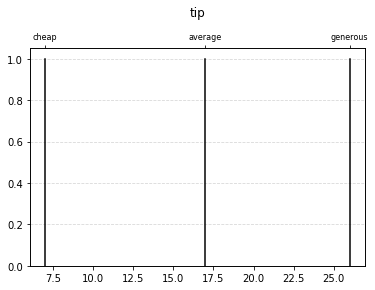

In [6]:
# A group may be plotted with the 'plot' method
groupset["tip"].plot()
plt.show()

##### Create Fuzzy Ruleset

> The other element of a FIS is the ruleset. FuzzyRulesets may be defined with strings representing the rules. The groups and function names of the groupset must be used. Multiple antecedents connected with 'and' and 'or' are supported.

In [7]:
ruleset = hf.FuzzyRuleset([
    "if service is poor or food is rancid then tip is cheap",
    "if service is good then tip is average",
    "if service is excellent or food is delicious then tip is generous",
])

##### Creating the FIS

In [8]:
# Create the fuzzy inference system
fis = hf.FIS(groupset, ruleset)

---

## FIS Evaluation  <a name="c2"></a>

##### Set Inputs

In [22]:
# Inputs must map the input group names as strings to scalar or array-like inputs
# Dictionary and Pandas DataFrames are examples of valid input formats
inputs = {"service": 4.3, "food": 6.5}

##### Evaluate the FIS

> To perform Mamdani evaluation as well as visualize and defuzzify output, the new FIS has the 'eval_mamdani', 'defuzz_mamdani', and 'plot_mamdani' methods. The 'eval_mamdani' method is used to create a dictionary of outputs for each output group. In this case, there will only be output for the 'heater' group. Fuzzified outputs are stored in a tuple with both a domain and codomain as arrays.

In [28]:
# Get dictionary of outputs for each group
all_outputs = fis.eval_tsk(inputs)

# Get output tuple with domain and codomain for heater group
tip_output = all_outputs["tip"]

# Print input and output
print(f"Service : ({inputs['service']})")
print(f"Food    : ({inputs['food']})")
print(f"--> Tip ({tip_outputs})")

Service : (4.3)
Food    : (6.5)
--> Tip (19.75)


##### Plotting Output

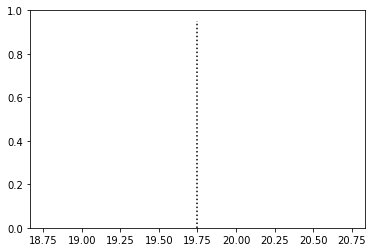

In [31]:
# Plot only output
fis.plot_tsk(tip_output)
plt.show()

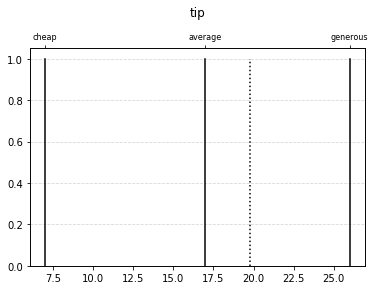

In [32]:
# Plot both group and output
fis.groupset["tip"].plot()
fis.plot_tsk(tip_output)
#plt.savefig("img/tsk_ex.png", bbox_inches="tight", facecolor="white")
plt.show()